### **MBDS DDB Assignment 3 Tania**

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["image.cmap"] = "viridis"

#### **Dataset and feature engineering**

In [3]:
train_data = pd.read_csv('application_train.csv')
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_data = pd.read_csv('application_test.csv')
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
frames = [train_data,test_data]
data = pd.concat(frames)
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,NaN,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,NaN,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,NaN,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


**Numeric variables**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,356255.0,278128.000000,102842.104413,100001.0,189064.5,278128.0,367191.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,356255.0,0.414316,0.720378,0.0,0.0,0.0,1.0,20.0
AMT_INCOME_TOTAL,356255.0,170116.059860,223506.819009,25650.0,112500.0,153000.0,202500.0,117000000.0
AMT_CREDIT,356255.0,587767.413753,398623.693715,45000.0,270000.0,500211.0,797557.5,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,308687.0,0.006281,0.104250,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,308687.0,0.029995,0.191374,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,308687.0,0.231697,0.855949,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,308687.0,0.304399,0.786915,0.0,0.0,0.0,0.0,261.0


**Categorical variables**

In [7]:
data.describe(exclude=np.number).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,356255,2,Cash loans,326537
CODE_GENDER,356255,3,F,235126
FLAG_OWN_CAR,356255,2,N,235235
FLAG_OWN_REALTY,356255,2,Y,246970
NAME_TYPE_SUITE,354052,7,Unaccompanied,288253
NAME_INCOME_TYPE,356255,8,Working,183307
NAME_EDUCATION_TYPE,356255,5,Secondary / secondary special,252379
NAME_FAMILY_STATUS,356255,6,Married,228715
NAME_HOUSING_TYPE,356255,6,House / apartment,316513
OCCUPATION_TYPE,244259,18,Laborers,63841


**Distribution of the target variable**

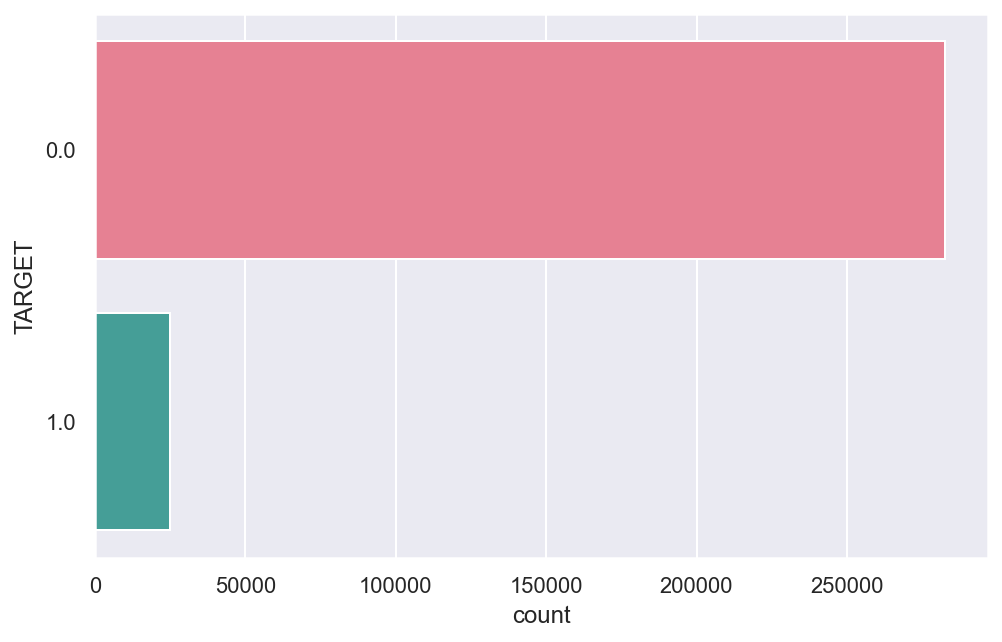

In [8]:
ax = sns.countplot(y=data.TARGET, data=data, palette='husl')

In [9]:
y_perc = pd.DataFrame(data.value_counts(data.TARGET), columns=['count'])
y_perc['perc'] = round(100 * y_perc['count'] / y_perc['count'].sum(), 2)
y_perc

,count,perc
TARGET,,
0.0,282686,91.93
1.0,24825,8.07


Examining the target variable and categorical variables:

Text(0.5, 22.960000000000008, 'Occupation type')

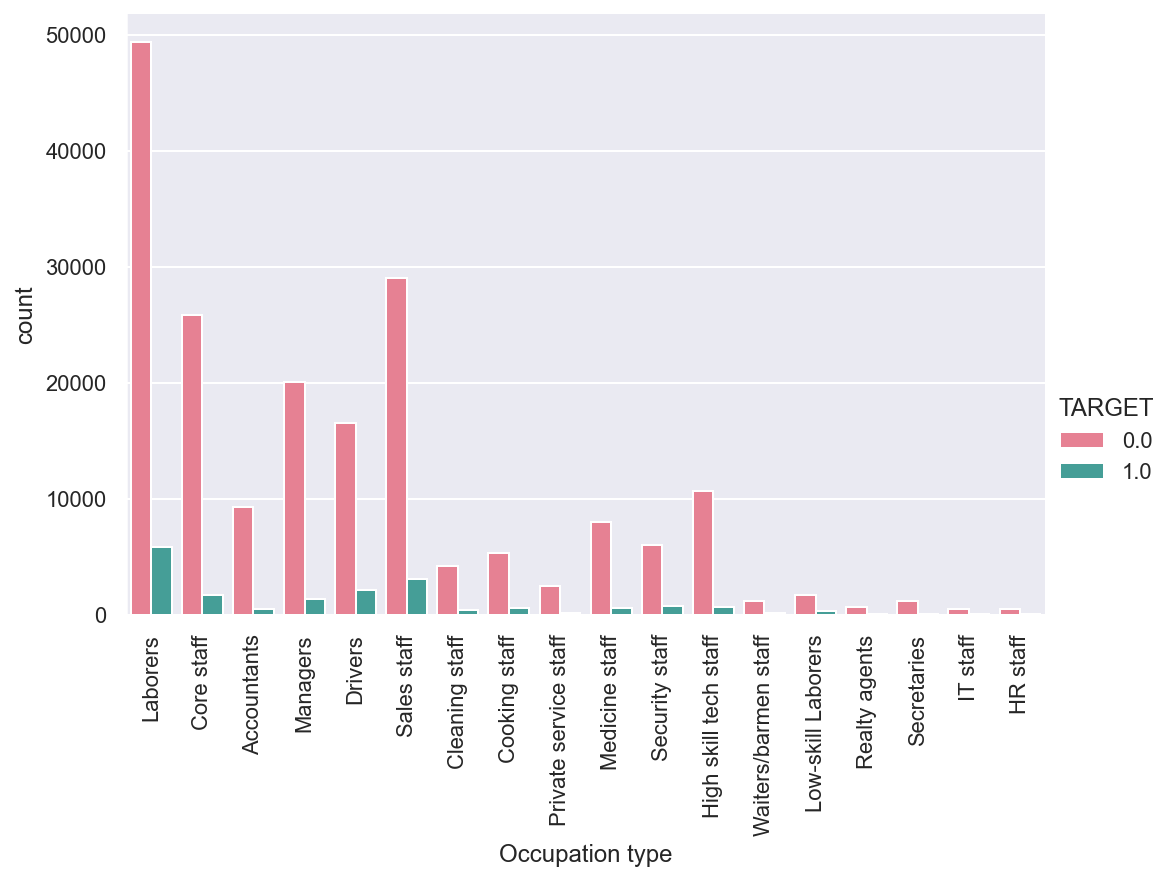

In [10]:
sns.factorplot('OCCUPATION_TYPE', data=data, aspect = 1.5, kind='count', hue='TARGET', palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Occupation type')

Text(0.5, 22.960000000000008, 'Education')

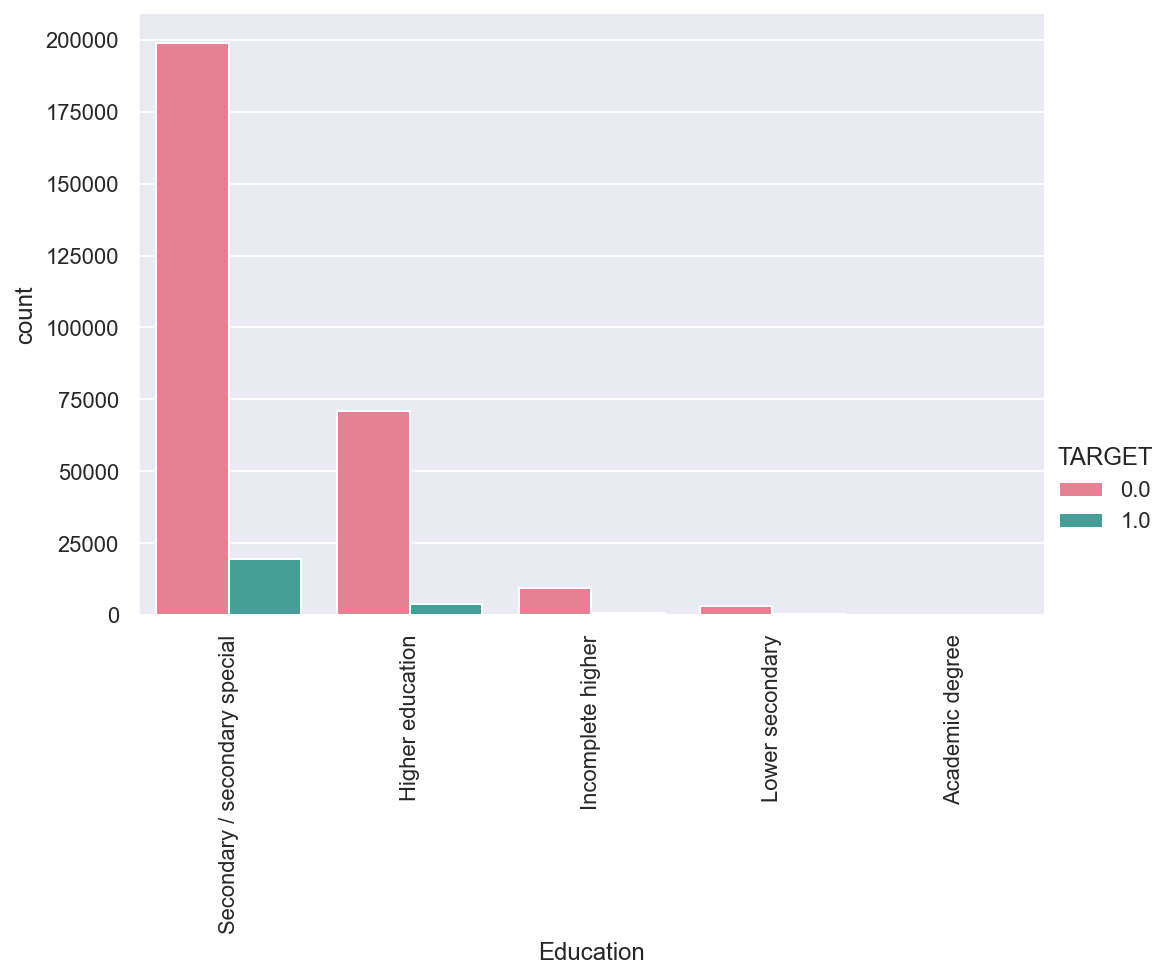

In [11]:
sns.factorplot('NAME_EDUCATION_TYPE', data=data, aspect = 1.5, kind='count', hue='TARGET', palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Education')

Text(0.5, 22.960000000000015, 'Gender')

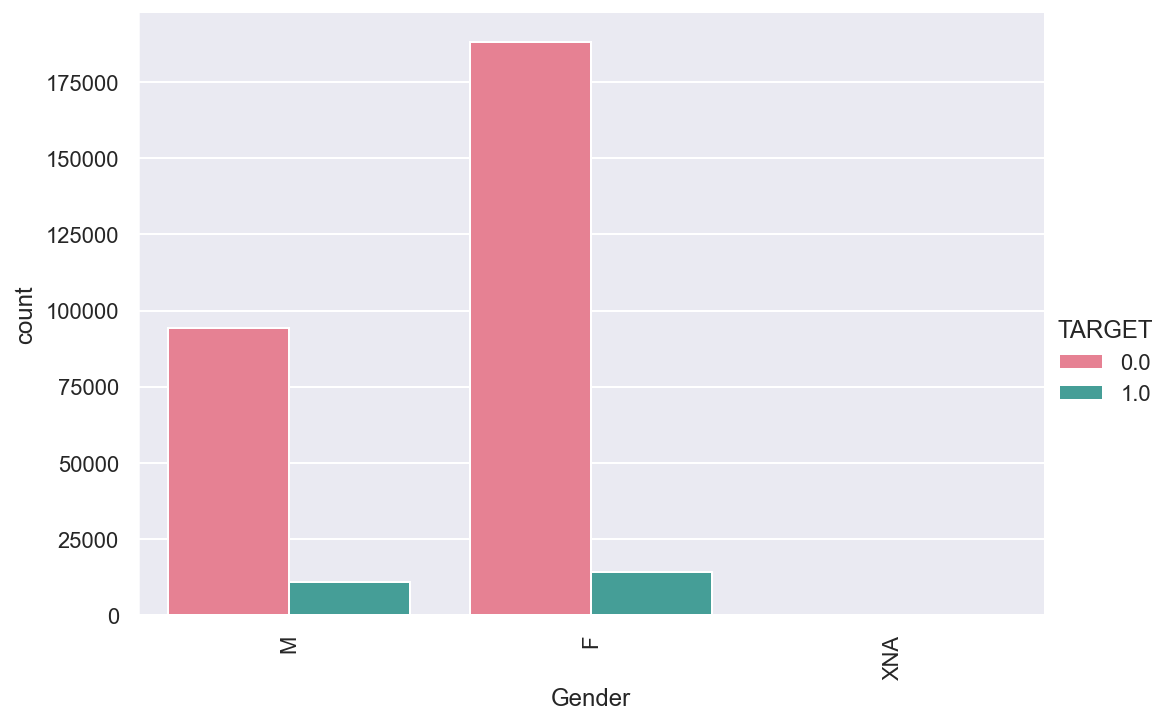

In [12]:
sns.factorplot('CODE_GENDER', data=data, aspect = 1.5, kind='count', hue='TARGET', palette='husl')
plt.xticks(rotation=90)
plt.xlabel('Gender')

**Creating the model**

In [13]:
for col in train_data:
    if len(list(train_data[col].unique())) >= 2:
        train_data_f = pd.get_dummies(train_data, columns=[col], drop_first=True)

In [ ]:
for col in test_data:
    if len(list(test_data[col].unique())) >= 2:
        test_data_f = pd.get_dummies(test_data, columns=[col], drop_first=True)

NameError: name 'test_data' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train = train_data_f['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERCENCYSTATE_MODE']
y_train = train_data_f['TARGET']

X_test = test_data_f

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
predictions = lr.predict(X_test)

**MODEL EVALUATION**

In [ ]:
cm = metrics.confusion_matrix(y_train, predictions)
cm

In [ ]:
sns.heatmap(cm, cmap='Pinks', annot=True, fmt='.1%')

In [ ]:
print(metrics.classification_report(y_train,predictions))

In [ ]:
from imblearn.over_sampling import SMOTE

columns = X_train.columns
os = SMOTE(random_state=0)

os_data_X,os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['TARGET'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [ ]:
os_y_count = pd.DataFrame(os_data_y.value_counts(), columns=['count']).sort_values(by= 'y').reset_index()
os_y_count['perc'] = os_y_count['count'].div(sum(os_y_count['count']), axis=0)
os_y_count

In [ ]:
X = os_data_X
y = os_data_y

os_X_train, os_X_test, os_y_train, os_y_test = train_test_split(os_data_X, os_data_y, test_size=0.30, random_state= 0)

lr_os = LogisticRegression()
lr_os.fit(os_X_train, os_y_train)

In [ ]:
os_predictions = lr_os.predict(os_data_X)

In [ ]:
cm_os = metrics.confusion_matrix(os_y_test, os_predictions)
cm_os

In [ ]:
sns.heatmap(cm_os, cmap='Pinks', annot=True, fmt='.1%')

In [ ]:
print(metrics.classification_report(os_y_test, os_predictions))